<a href="https://colab.research.google.com/github/ameympatil/CarPricePrediction/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [306]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [307]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')

In [308]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [309]:
pd.set_option('max_columns',30)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [310]:
df.shape

(205, 26)

In [311]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [312]:
# Droping car_ID column
df = df.drop('car_ID',axis=1)
df['symboling'] = df['symboling'].astype(str)

In [313]:
# Dtype of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [314]:
df.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [315]:
df.head(20)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [316]:
df.corr()['price']

wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [317]:
df['Company'] = df['CarName'].str.split(' ', expand = True)[0]
df.drop('CarName',axis=1,inplace=True)

In [318]:
numerical_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'Company'],
      dtype='object')

# Univariate Analysis

### Categorical Variables

1. Symboling

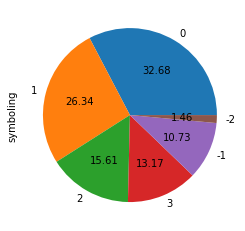

In [319]:
df['symboling'].value_counts().plot(kind='pie',autopct='%.2f')




*   13.17% of the cars are symboled 'risky'.
*   None of the cars have been rated -3 which is totally safe.





2. Fuel type

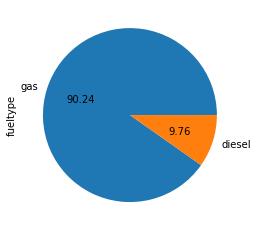

In [320]:
df['fueltype'].value_counts().plot(kind='pie',autopct='%.2f')



*   Around 90% of the vehicles has the fueltype as gas


3. Aspiration

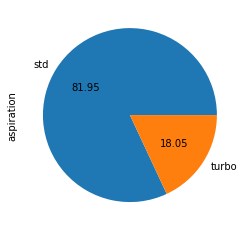

In [321]:
df['aspiration'].value_counts().plot(kind='pie',autopct='%.2f')



*   Only 18.05% cars have turbo aspiration



4. Door number

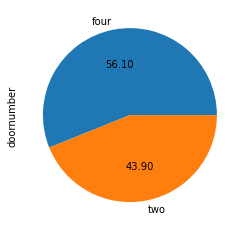

In [322]:
df['doornumber'].value_counts().plot(kind='pie',autopct='%.2f')

5. Enginelocation

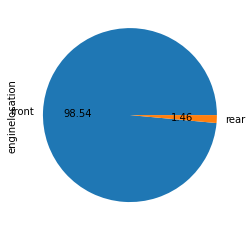

In [323]:
df['enginelocation'].value_counts().plot(kind='pie',autopct='%.2f')



*   98% cars have engine in the front


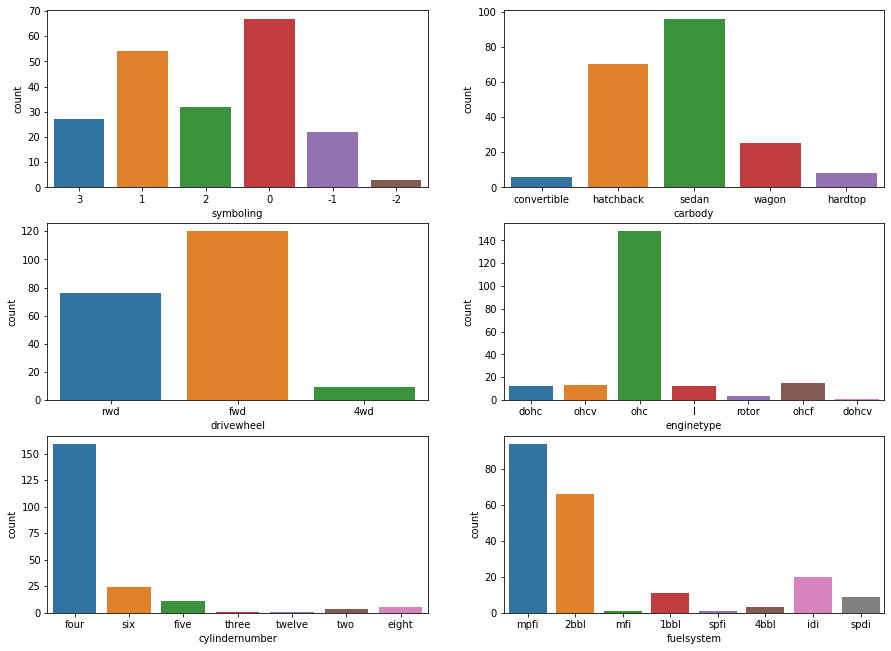

In [324]:
cols = numerical_data.columns

plt.figure(figsize = (15, 15))
        
plt.subplot(4,2,1)
sns.countplot(df['symboling'])

plt.subplot(4,2,2)
sns.countplot(df['carbody'])

plt.subplot(4,2,3)
sns.countplot(df['drivewheel'])

plt.subplot(4,2,4)
sns.countplot(df['enginetype'])

plt.subplot(4,2,5)
sns.countplot(df['cylindernumber'])

plt.subplot(4,2,6)
sns.countplot(df['fuelsystem'])


plt.show()

### Numerical Variables

In [325]:
numerical_data.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [326]:
numerical_data.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

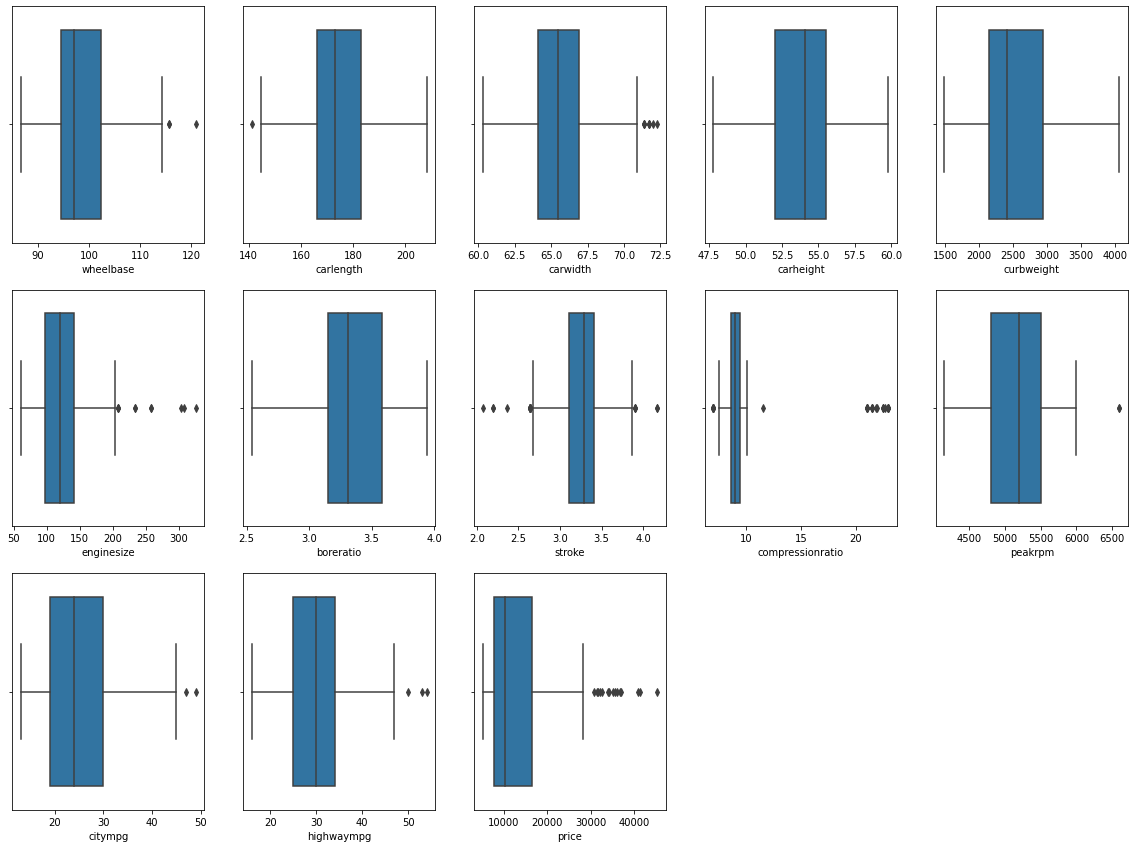

In [327]:
cols = numerical_data.columns

plt.figure(figsize = (20, 20))
        
plt.subplot(4,5,1)
sns.boxplot(df['wheelbase'])

plt.subplot(4,5,2)
sns.boxplot(df['carlength'])

plt.subplot(4,5,3)
sns.boxplot(df['carwidth'])

plt.subplot(4,5,4)
sns.boxplot(df['carheight'])

plt.subplot(4,5,5)
sns.boxplot(df['curbweight'])

plt.subplot(4,5,6)
sns.boxplot(df['enginesize'])

plt.subplot(4,5,7)
sns.boxplot(df['boreratio'])

plt.subplot(4,5,8)
sns.boxplot(df['stroke'])

plt.subplot(4,5,9)
sns.boxplot(df['compressionratio'])

plt.subplot(4,5,10)
sns.boxplot(df['peakrpm'])

plt.subplot(4,5,11)
sns.boxplot(df['citympg'])

plt.subplot(4,5,12)
sns.boxplot(df['highwaympg'])

plt.subplot(4,5,13)
sns.boxplot(df['price'])

plt.show()



*   Columns carwidth, enginesize, stroke, compressionratio have high number of outliers



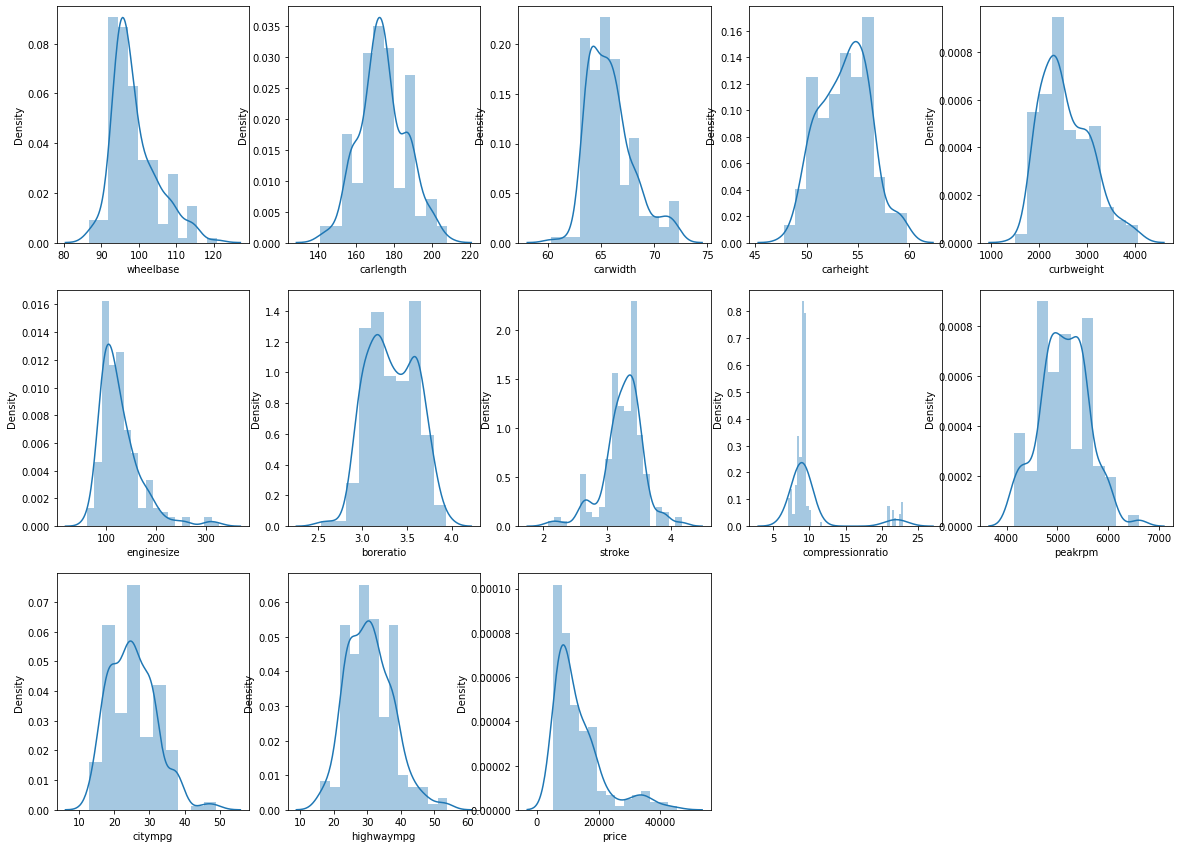

In [328]:
cols = numerical_data.columns

plt.figure(figsize = (20, 20))
        
plt.subplot(4,5,1)
sns.distplot(df['wheelbase'])

plt.subplot(4,5,2)
sns.distplot(df['carlength'])

plt.subplot(4,5,3)
sns.distplot(df['carwidth'])

plt.subplot(4,5,4)
sns.distplot(df['carheight'])

plt.subplot(4,5,5)
sns.distplot(df['curbweight'])

plt.subplot(4,5,6)
sns.distplot(df['enginesize'])

plt.subplot(4,5,7)
sns.distplot(df['boreratio'])

plt.subplot(4,5,8)
sns.distplot(df['stroke'])

plt.subplot(4,5,9)
sns.distplot(df['compressionratio'])

plt.subplot(4,5,10)
sns.distplot(df['peakrpm'])

plt.subplot(4,5,11)
sns.distplot(df['citympg'])

plt.subplot(4,5,12)
sns.distplot(df['highwaympg'])

plt.subplot(4,5,13)
sns.distplot(df['price'])

plt.show()

# Bivariate/Multivariate Analysis

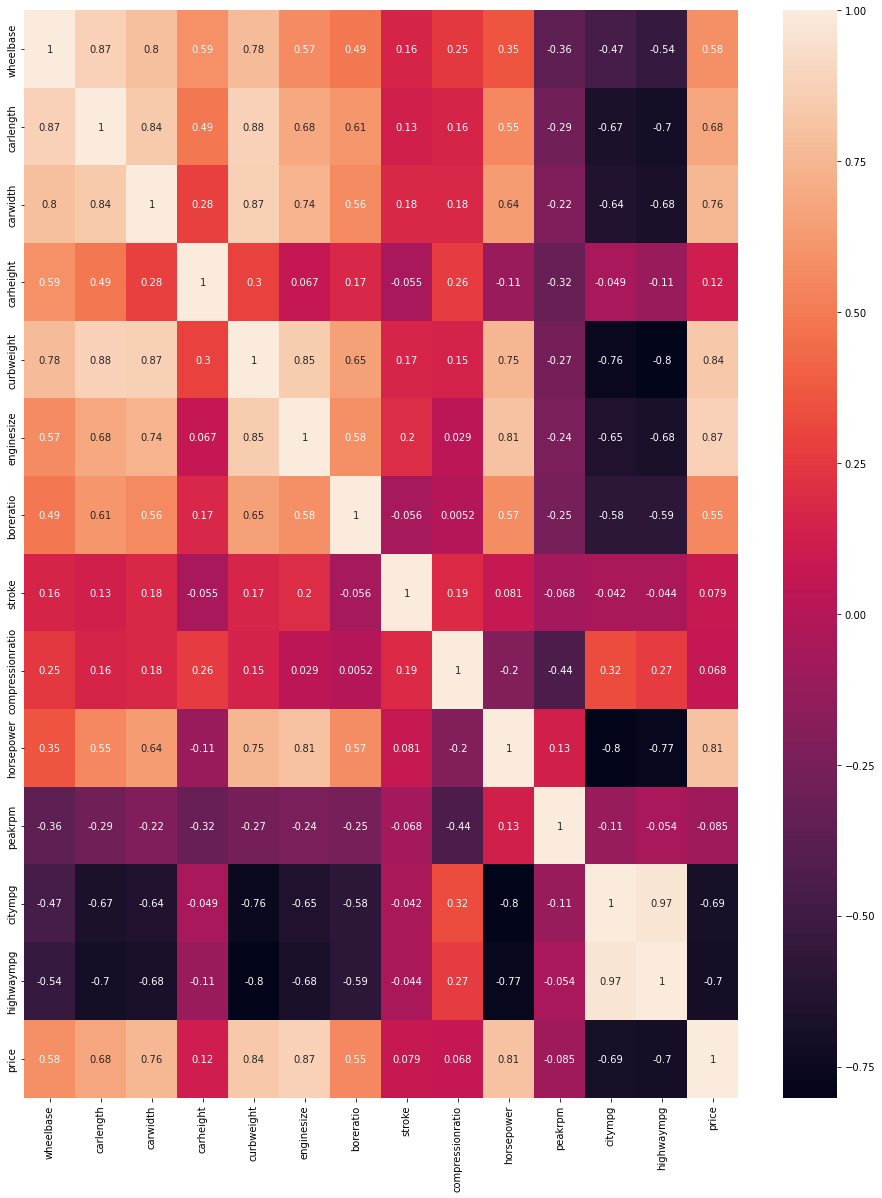

In [329]:
plt.figure(figsize=(16,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Positive Correlation**


*   Price – carlength, carwidth, curbweight, engine_size, horsepower

*   wheelbase – carlength, carwidth, curbweight, engine_size, price

*   horsepower – carwidth, curbweight, engine_size, bore, price

*   Highway mpg – city mpg


**Negative Correlation**


*   Price – highway_mpg, city_mpg

*   highway_mpg – carlength, carwidth, curb_weight, engine_size, bore, horsepower, price
*   city – wheel base, length, width, curb_weight, engine_size, bore, horsepower, price









In [330]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
 13  price             205 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 22.5 KB


In [331]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'Company'],
      dtype='object')

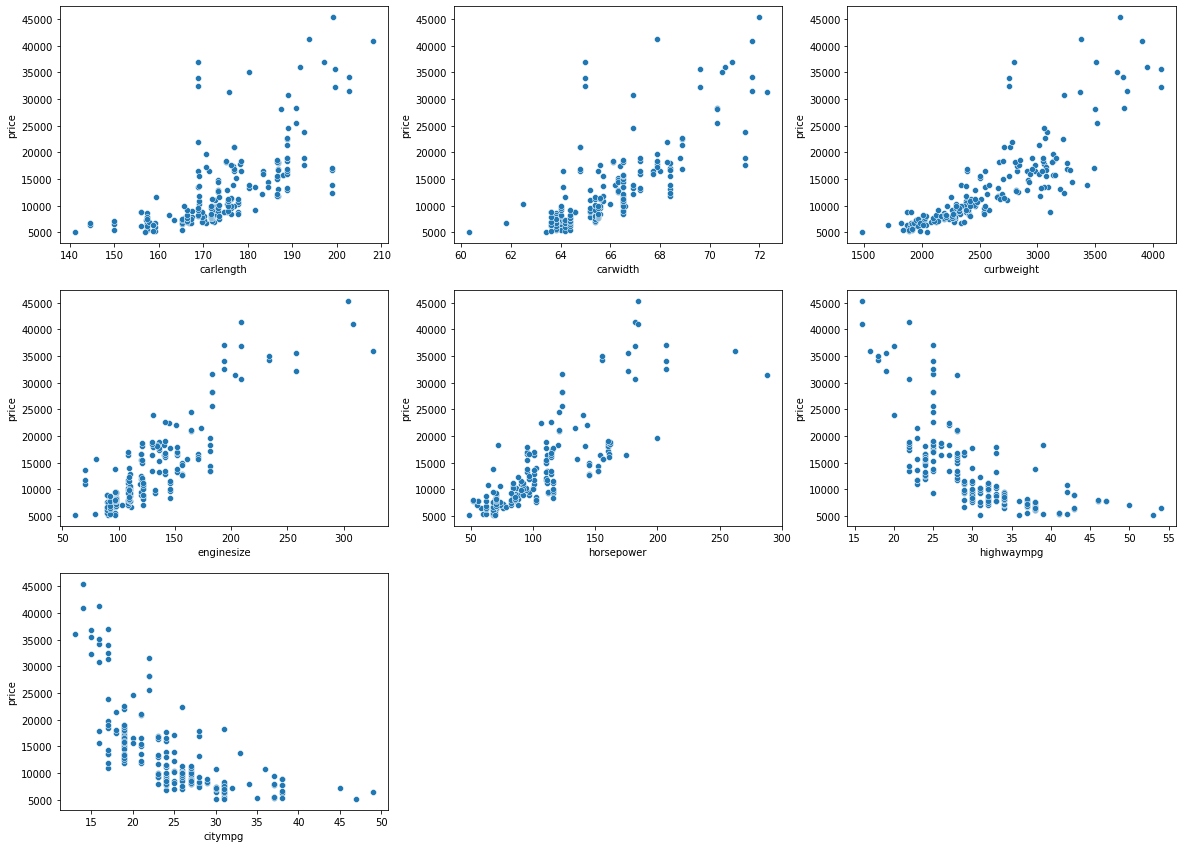

In [332]:
cols = numerical_data.columns

plt.figure(figsize = (20, 20))
        
plt.subplot(4,3,1)
sns.scatterplot(df['carlength'],df['price'])

plt.subplot(4,3,2)
sns.scatterplot(df['carwidth'],df['price'])

plt.subplot(4,3,3)
sns.scatterplot(df['curbweight'],df['price'])

plt.subplot(4,3,4)
sns.scatterplot(df['enginesize'],df['price'])

plt.subplot(4,3,5)
sns.scatterplot(df['horsepower'],df['price'])

plt.subplot(4,3,6)
sns.scatterplot(df['highwaympg'],df['price'])

plt.subplot(4,3,7)
sns.scatterplot(df['citympg'],df['price'])

plt.show()



*   Car Price increases with the increase in carlength, carwidth, curbweight, enginesize, horsepower
*   Car Price decreases with the increase in citympg and highwaympg



In [333]:
categorical_data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'Company'],
      dtype='object')

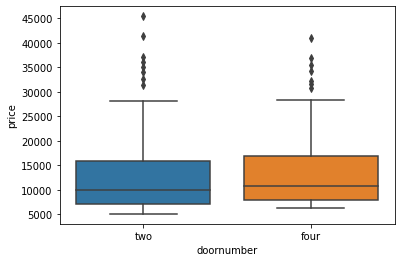

In [334]:
sns.boxplot(df['doornumber'],df['price'])

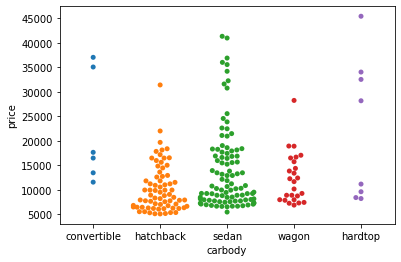

In [335]:
sns.swarmplot(x=df['carbody'], y=df['price'], data=df) 

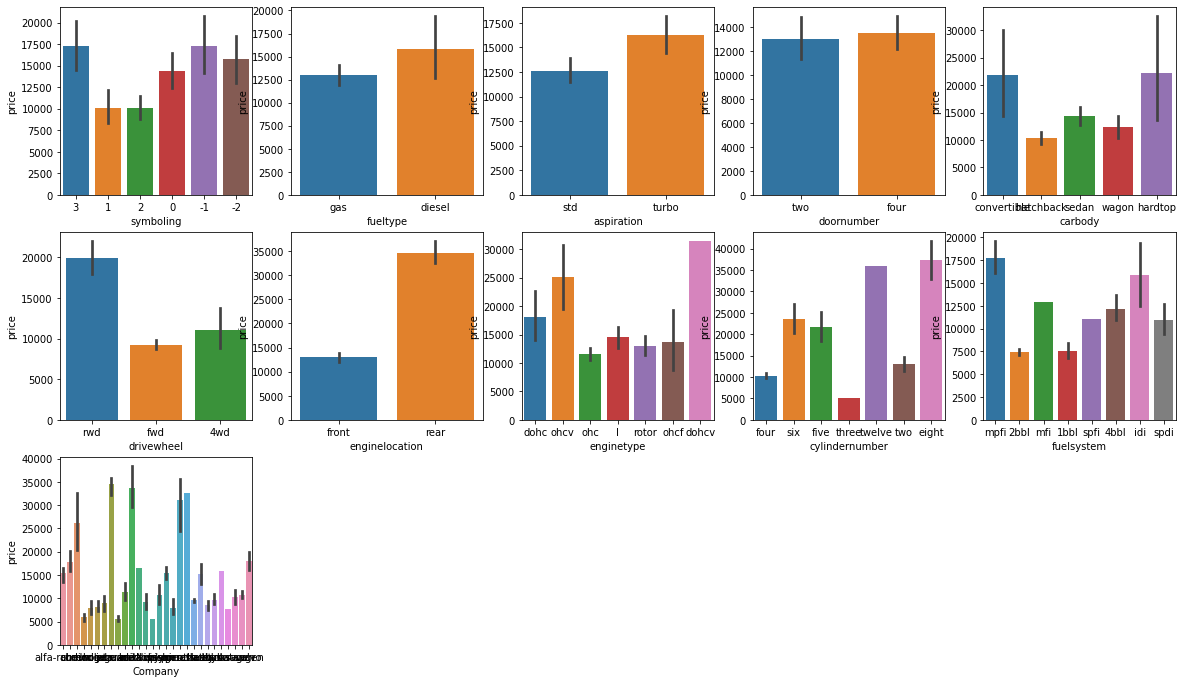

In [336]:
cols = categorical_data.columns
plt.figure(figsize=(20,20))
for i in range(len(cols)):
  plt.subplot(5,5,i+1)
  #print(i)
  sns.barplot(x=df[cols[i]], y=df['price'], data=df) 

In [338]:
df['Company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: Company, dtype: int64